In [1]:


import numpy as np
import pandas as pd
# 추세 그래프 및 통계용 차트를 제공하는  시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt
# os : 환경설정 패키지
import os
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pylab as plt
import matplotlib as mpl

# sklearn.tree 의 DecisonTreeClassifier:분류 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
# graphviz import: 의사결정 나무 모델 시각화 .dot 확장자 파일 불러오는 패키지
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale
from sklearn.svm import SVC

In [2]:
ds_health = pd.read_csv("../../실습화일/유방암.csv",engine ="python",encoding = 'euc-kr')
ds_health.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:

#get_dummies : 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_health_dummy = pd.get_dummies(ds_health)
#더미변수 생성된 데이터의 상위 5개 row를 확인
ds_health_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#dummy 변수로부터 변수 역할 지정
ds_health_y = ds_health_dummy["diagnosis"]
ds_health_x = ds_health_dummy.drop("diagnosis", axis = 1, inplace = False)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터비율, random_state : 랜덤)
ds_health_train_x, ds_health_test_x, ds_health_train_y, ds_health_test_y =\
train_test_split(ds_health_x, ds_health_y, test_size = 0.30, random_state = 1234)

# train data 와 test data의 크기 
print("train data X size : {}".format(ds_health_train_x.shape))
print("train data Y size : {}".format(ds_health_train_y.shape))
print("test data X size : {}".format(ds_health_test_x.shape))
print("test data Y size : {}".format(ds_health_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [5]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(ds_health_train_x, ds_health_train_y)

#훈련 데이터 셋 정확도
print("Accucary on training set:{:.3f}".format(svm_uncustomized.score(ds_health_train_x, ds_health_train_y)))
#test 데이터 셋 정확도
print("Accucary on test set:{:.3f}".format(svm_uncustomized.score(ds_health_test_x, ds_health_test_y)))

Accucary on training set:1.000
Accucary on test set:0.614


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
#train 데이터셋 스케일 조정
ds_health_train_x_scaled = scale(ds_health_train_x, axis = 0)
# test 데이터셋 스케일 조정
ds_health_test_x_scaled = scale(ds_healds_health_test_xth_test_x, axis = 0)
#스케일이 변경된 X변수 확인
pd.DataFrame(ds_health_train_x_scaled, columns = ds_health_train_x.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,...,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,...,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,...,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,...,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,...,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


In [33]:
from sklearn.model_selection import GridSearchCV                                                                                                                                                                                                                                                                                                                                               
from sklearn.metrics import roc_auc_score
param_grid = {'C': np.arange(0.1, 1.1, 0.1),'gamma': np.arange(0 ,1, 0.1)} 
#gridSearchCV를 이용하여 랜덤포레스트의 최적을 찾는다.
svm = GridSearchCV(svm_uncustomized, param_grid, n_jobs = 8)
svm.fit(ds_health_train_x_scaled, ds_health_train_y)


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
svm.score(ds_health_train_x_scaled, ds_health_train_y), svm.best_score_, svm.best_params_

(0.9874371859296482, 0.949748743718593, {'C': 0.2, 'gamma': 0.1})

즉, C = 0.2, gamma = 0.1 일때가 최적의 값이다. 
최적의 값음 위와 같다.

In [35]:
final=SVC(C = 0.2, gamma = 0.1, random_state = 1234)
final.fit(ds_health_train_x_scaled, ds_health_train_y)

print("train accuracy:{0:.3f}".format(final.score(ds_health_train_x_scaled,ds_health_train_y)))
print("test accuracy:{0:.3f}".format(final.score(ds_health_test_x_scaled,ds_health_test_y)))

train accuracy:0.987
test accuracy:0.901


train 데이터와 test 데이터의 accuracy를 확인한다. 가장 최적의 값일때 두 값을 가진다.

roc_curve를 그리기 위해 이상적인 모델을 하나와 다른 모델간의 비교를 한다.

In [47]:
model2 = SVC(random_state = 1234)
probas = svm.fit(ds_health_train_x_scaled, ds_health_train_y).decision_function(ds_health_test_x_scaled)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


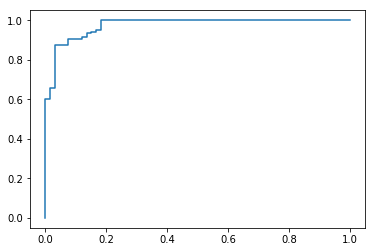

In [50]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics
# y_pred_proba = model2.predict_proba(ds_health_train_x_scaled)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(ds_health_test_y, probas)   
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)

decision_functio은 결정함수로 최적의 값을 찾아준다. 그 데이터와 test데이터를 바탕으로 roc_curve를 그려보았다
y=x와 달리 바로 0.0에서 치솟아서 올라가는것을 보면 그렇게 나쁜 성능은 아닌것같다.